In [4]:
library(igraph)

# Function to generate a fitness model scale-free network
generate_fitness_model_network <- function(n, m, fitness) {
  # Create an empty graph
  graph <- make_empty_graph(directed = FALSE)

  # Add initial m nodes to the graph
  graph <- add_vertices(graph, m)

  # Initialize node fitness values
  fitness_values <- rep(1, m)

  # Iterate over remaining nodes
  for (i in (m + 1):n) {
    # Calculate the probability of connecting to existing nodes based on fitness
    probabilities <- fitness_values / sum(fitness_values)
    cat(probabilities,'\n')
    cat('....',sum(probabilities),'\n')

    # Check if probabilities sum to zero (all fitness values are zero)
    if (sum(probabilities) == 0) {
      # If all fitness values are zero, assign equal probabilities
      probabilities <- rep(1, m) / m
    }

    # Perform preferential attachment to connect to m existing nodes
    cat('aaaa', 1:(i - 1), '\n')
    cat('sampleee', sample(1:(i-1), m, replace = FALSE, prob = probabilities), '\n')
    new_edges <- sample(1:(i-1), m, replace = FALSE, prob = probabilities)
    
    # Add the new node and its edges to the graph
    graph <- add_vertices(graph, 1)
    graph <- add_edges(graph, cbind(rep(i, m), new_edges))
    
    # Update fitness values
    fitness_values <- c(fitness_values, fitness)
    cat('fitnes', fitness_values, '\n')
  }

  return(graph)
}

# Parameters
n <- 100  # Total number of nodes
m <- 3    # Number of edges to attach from each new node
fitness <- c(2, 1, 3)  # Fitness values for the initial nodes

# Generate the fitness model scale-free network
network <- generate_fitness_model_network(n, m, fitness)

# Plot the network
plot(network, layout = layout_with_fr)

0.3333333 0.3333333 0.3333333 
.... 1 
aaaa 1 2 3 
sampleee 1 2 3 
fitnes 1 1 1 2 1 3 
0.1111111 0.1111111 0.1111111 0.2222222 0.1111111 0.3333333 
.... 1 
aaaa 1 2 3 4 


ERROR: Error in sample.int(length(x), size, replace, prob): incorrect number of probabilities


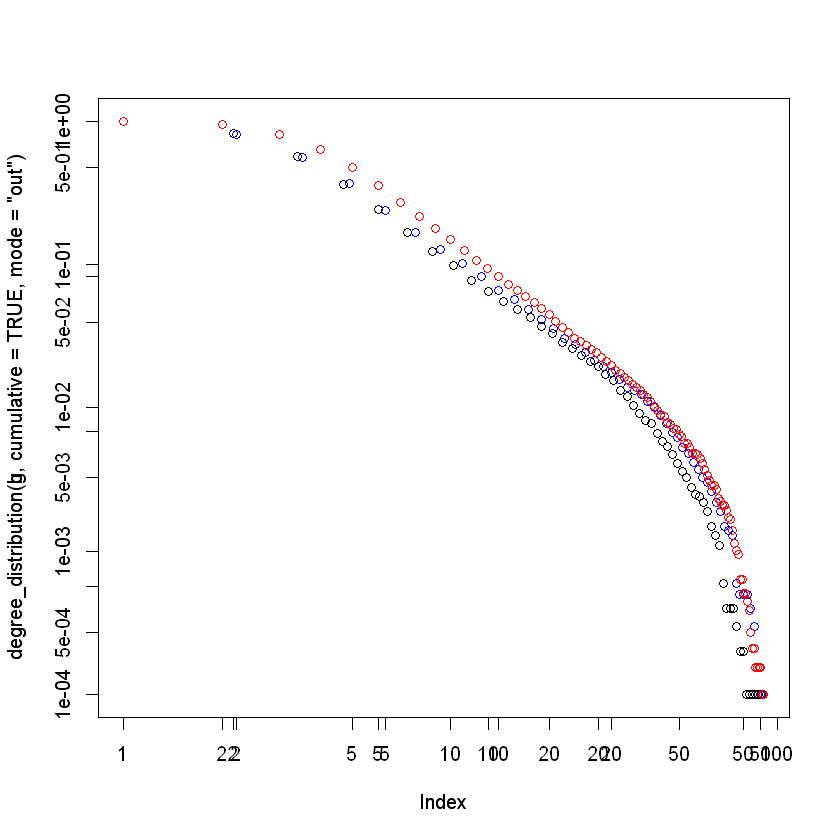

In [30]:
f <- sample_fitness_pl(10000, 30000, 2.2) #, 2.3)
plot(degree_distribution(g, cumulative = TRUE, mode = "out"), log = "xy",col='blue')

par(new=TRUE)

g <- sample_fitness_pl(10000, 30000, 2.2, 2.3)
plot(degree_distribution(g, cumulative = TRUE, mode = "out"), log = "xy")

par(new=TRUE)

h <- sample_fitness_pl(10000, 30000, 2.2, -3)
plot(degree_distribution(h, cumulative = TRUE, mode = "out"), log = "xy", col='red')

In [14]:
library(igraph)

# Function to generate a Barabasi-Albert scale-free network
generate_barabasi_albert_network <- function(n, m) {
  # Create an empty graph
  graph <- make_empty_graph(directed = FALSE)

  # Add initial m nodes to the graph
  graph <- add_vertices(graph, m)

  # Initialize node degrees
  degrees <- rep(0, m)

  # Iterate over remaining nodes
  for (i in (m + 1):n) {
    # Calculate the probability of connecting to existing nodes based on their degrees
    probabilities <- degrees / sum(degrees)

    # Perform preferential attachment to connect to m existing nodes
    new_edges <- sample(1:(i-1), m, replace = FALSE, prob = probabilities)

    # Add the new node and its edges to the graph
    graph <- add_vertices(graph, 1)
    graph <- add_edges(graph, cbind(rep(i, m), new_edges))

    # Update degrees
    degrees <- c(degrees, rep(m, m))
    degrees[new_edges] <- degrees[new_edges] + 1
  }

  return(graph)
}

# Parameters
n <- 100  # Total number of nodes
m <- 3


network <- generate_barabasi_albert_network(n,m)

plot(network, layout = layout_with_fr)

ERROR: Error in sample.int(length(x), size, replace, prob): NA in probability vector


In [34]:
library(igraph)

# Function to generate a fitness model scale-free network
generate_fitness_model_network <- function(n, m, fitness) {
  # Create an empty graph
  graph <- make_empty_graph(directed = FALSE)

  # Add initial m nodes to the graph
  graph <- add_vertices(graph, m)

  # Initialize node fitness values
  fitness_values <- c(rep(1, m), rep(0, n - m))

  # Iterate over remaining nodes
  for (i in (m + 1):n) {
    # Calculate the probability of connecting to existing nodes based on fitness
    probabilities <- fitness_values / sum(fitness_values)
    cat('priba', probabilities, '\n')
    cat( probabilities[fitness_values > 0], '\n')
    cat('coso',(1:(i-1))[fitness_values > 0], '\n')
    
    # Perform preferential attachment to connect to m existing nodes
    new_edges <- sample((1:(i-1))[fitness_values > 0], m, replace = FALSE, prob = probabilities[fitness_values > 0])

    # Add the new node and its edges to the graph
    graph <- add_vertices(graph, 1)
    graph <- add_edges(graph, cbind(rep(i, m), new_edges))

    # Update fitness values
    fitness_values <- c(fitness_values, fitness[i], rep(0, m - 1))
    cat('updat',fitness[i],'..',fitness_values, '\n')
  }

  return(graph)
}

# Parameters
n <- 100  # Total number of nodes
m <- 3    # Number of edges to attach from each new node
fitness <- c(2, 1, 3)  # Fitness values for the initial nodes

# Generate the fitness model scale-free network
network <- generate_fitness_model_network(n, m, fitness)

# Plot the network
plot(network, layout = layout_with_fr)

priba 0.3333333 0.3333333 0.3333333 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0.3333333 0.3333333 0.3333333 
coso 1 2 3 
updat NA .. 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 NA 0 0 
priba NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA 
NA NA NA NA 
coso 1 2 3 NA 


ERROR: Error in sample.int(length(x), size, replace, prob): NA in probability vector


[1] 0.4618 0.2013 0.0797 0.0477 0.0252 0.0206 0.0154 0.0126 0.0098 0.0076
 [11] 0.0078 0.0056 0.0051 0.0040 0.0033 0.0035 0.0029 0.0033 0.0021 0.0030
 [21] 0.0014 0.0015 0.0016 0.0025 0.0022 0.0012 0.0021 0.0012 0.0008 0.0019
 [31] 0.0010 0.0008 0.0011 0.0010 0.0009 0.0004 0.0012 0.0006 0.0008 0.0010
 [41] 0.0016 0.0011 0.0017 0.0012 0.0013 0.0012 0.0009 0.0008 0.0008 0.0006
 [51] 0.0008 0.0003 0.0006 0.0003 0.0001 0.0003 0.0001 0.0000 0.0000 0.0000
 [61] 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001
 [71] 0.0000 0.0001 0.0000 0.0000 0.0000 0.0001 0.0003 0.0002 0.0002 0.0008
 [81] 0.0002 0.0008 0.0003 0.0003 0.0005 0.0003 0.0010 0.0004 0.0007 0.0002
 [91] 0.0009 0.0009 0.0012 0.0006 0.0013 0.0008 0.0012 0.0008 0.0011 0.0012
[101] 0.0004 0.0006 0.0004 0.0006 0.0002 0.0005 0.0006 0.0003 0.0003 0.0002
[111] 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000
[121] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[131] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[141] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[151] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[161] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[171] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[181] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[191] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[201] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[211] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[221] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[231] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[241] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[251] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0002 0.0001
[261] 0.0000 0.0000 0.0001 0.0000 0.0001 0.0000 0.0001 0.0003 0.0000 0.0000
[271] 0.0001 0.0007 0.0009 0.0002 0.0002 0.0004 0.0003 0.0002 0.0006 0.0009
[281] 0.0003 0.0009 0.0004 0.0007 0.0004 0.0010 0.0005 0.0008 0.0004 0.0003
[291] 0.0004 0.0003 0.0003 0.0004 0.0003 0.0004 0.0007 0.0002 0.0005 0.0004
[301] 0.0004 0.0003 0.0001 0.0004 0.0001 0.0000 0.0002 0.0001 0.0002 0.0003
[311] 0.0001 0.0002 0.0000 0.0000 0.0000 0.0001 0.0001 0.0001 0.0000 0.0000
[321] 0.0001 0.0000 0.0000 0.0001 0.0001

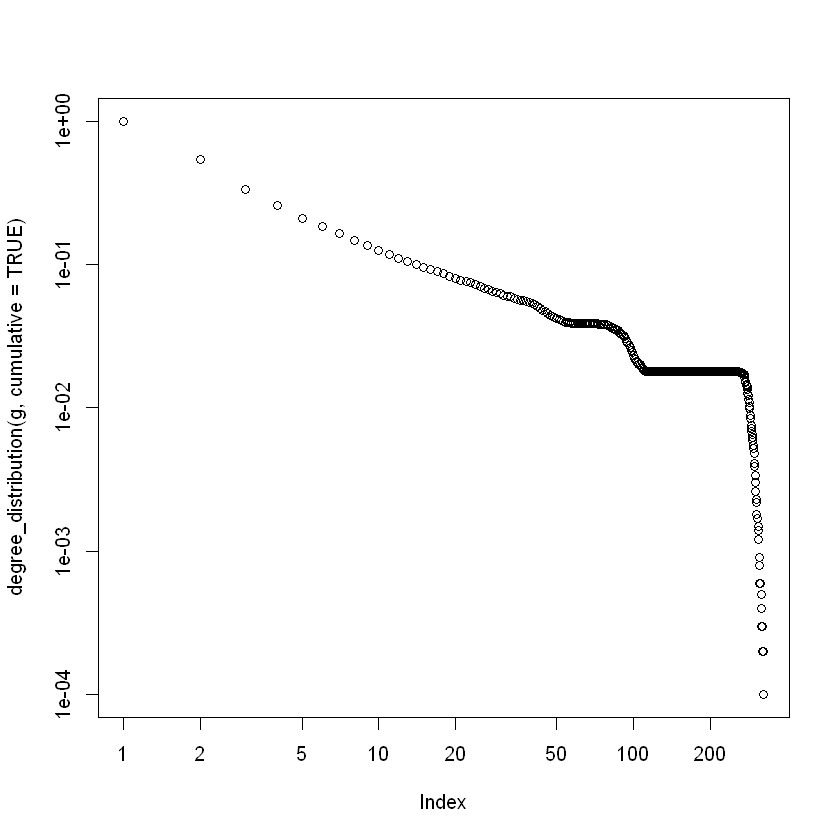

In [35]:
N <- 10000
g <- sample_fitness(5 * N, sample((1:50)^-2, N, replace = TRUE))
degree_distribution(g)
plot(degree_distribution(g, cumulative = TRUE), log = "xy")